In [1]:
import numpy as np
import pandas as pd

# Load .npy file using numpy
data_array = np.load('normal_data.npy')

# Reshape the array to 2D
#flattened_array = data_array.reshape(-1, data_array.shape[-1])

# Convert NumPy array to pandas DataFrame
#df = pd.DataFrame(flattened_array)

# Now 'df' is a DataFrame containing the flattened data from the .npy file


In [2]:
data_array.shape

(49, 9, 250000)

In [3]:
import torch 

In [4]:
X_tensor_data = torch.tensor(data_array)

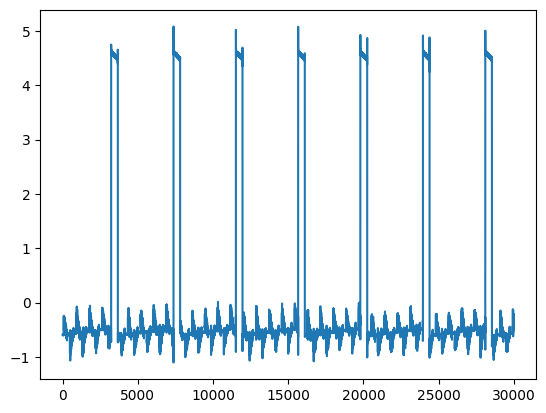

In [5]:
import matplotlib.pyplot as plt

n = int(len(data_array[0][0]))

plt.plot(np.arange(30000),data_array[0][0][n-30000:n])

In [6]:
len(X_tensor_data[0][0])

250000

#### Data Processing and Exploratory Data Analysis

Before we can feed the data into a machine learning algorithm, we need to perform some preliminary data processing. Let’s look at a plot of all the time-series signals under the normal operating condition for one training instance.

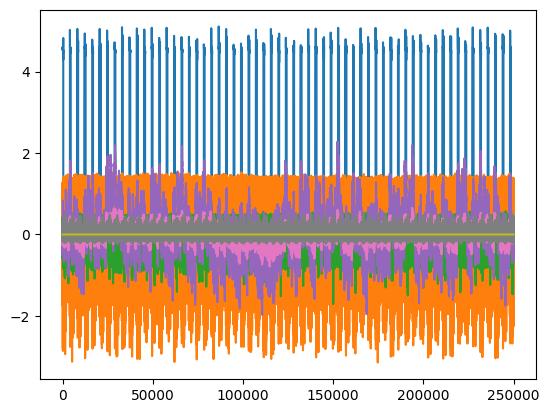

In [11]:
#instance 0 for each sensor 
fig, ax = plt.subplots()
for i in range(8):
    n = int(len(data_array[0][i]))
    ax.plot(np.arange(n),X_tensor_data[0][i])


The initial analysis of the data and data plot reveal two key insights:

    There are a large number of data points due to the high sample rate
    The signals are not on the same scale

Both of these insights would have implications on the machine learning algorithm:

    Too many data points would require longer model training times
    The different scales would skew the machine learning model results

#### Data Resampling

First, we should resample the data at a lower frequency to reduce the size of each training instance and therefore speed up the training algorithm. To determine the resampling rate, let’s analyze the frequency spectrum of signals using a Fast Fourier transform (FFT):

##### Fast Fourier Transform (FFT):

The Fast Fourier Transform (FFT) is an algorithm that efficiently computes the discrete Fourier transform (DFT) of a sequence, or its inverse. The DFT is a mathematical transformation that converts a signal from its original domain (usually time or space) to a representation in the frequency domain.

In the context of time series data, the FFT can be used to analyze the frequency components present in the signal. It decomposes a time series into its constituent frequencies, revealing the underlying periodic patterns.

Why Use FFT on Time Series Data:

    Frequency Analysis: FFT helps identify the dominant frequencies in a time series. This is crucial for understanding the periodic patterns, cycles, or trends present in the data.

    Filtering: By analyzing the frequency components, you can filter out unwanted noise or isolate specific frequency ranges that are of interest.

    Spectral Analysis: It provides a spectral representation of the time series, enabling the identification of significant frequency components and their amplitudes.

    Feature Extraction: FFT can be used to extract features from the time domain to be used in machine learning models.

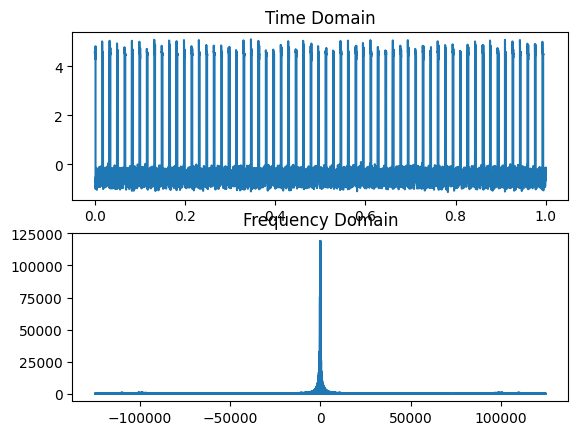

In [14]:
signal =X_tensor_data[0][0]
n = int(len(X_tensor_data[0][0]))
t = np.linspace(0, 1, n, endpoint=False)  
# Compute FFT
fft_result = np.fft.fft(signal)
freq = np.fft.fftfreq(n, d=t[1]-t[0])

# Plot the time series and its frequency spectrum
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Time Domain')

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_result))
plt.title('Frequency Domain')

plt.show()

In [21]:
int(len(data_array[0][0]))

250000

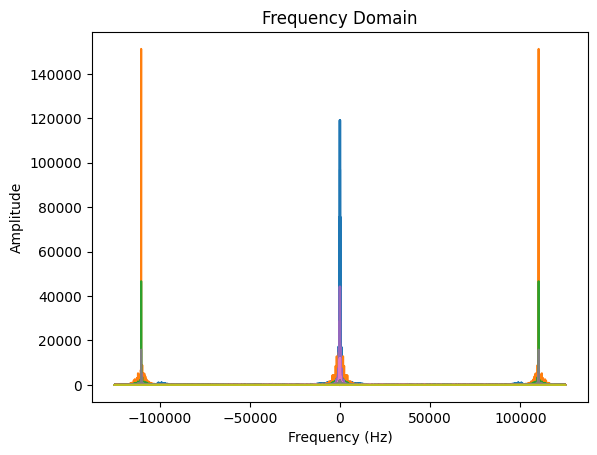

In [22]:

fig, ax = plt.subplots()
n = int(len(data_array[0][0]))
t = np.linspace(0, 1, n, endpoint=False) 

for i in range(9):
    signal =X_tensor_data[0][i]
    
    # Compute FFT
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(n, d=t[1]-t[0])

    ax.plot(freq, np.abs(fft_result))
    plt.title('Frequency Domain')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')

    #ax.plot(freq, np.abs(fft_result))



    Yes, it is normal to have negative values in the "Frequency (Hz)" when performing the Fast Fourier Transform (FFT) of a signal. In the context of the FFT, the frequency axis is typically represented as a two-sided spectrum, where positive frequencies are shown on one side and negative frequencies on the other. This is a result of the complex nature of the FFT output, which includes both positive and negative frequency components.

    The presence of negative frequencies in the FFT output is a mathematical consequence of the way the FFT is computed. In many practical applications, the negative frequency components are often discarded or not displayed, as they are redundant due to the symmetry of the FFT output for real-valued input signals. However, in some cases, such as when analyzing complex-valued signals or when working with two-sided spectra, the negative frequency components are relevant and should be considered.

    In summary, the presence of negative values in the "Frequency (Hz)" when performing the FFT is a normal and expected behavior, and it is a result of the complex nature of the FFT output and the two-sided nature of the frequency spectrum. The interpretation of the negative frequency components depends on the specific application and the nature of the input signal.

    Citations:
    [1] https://en.wikipedia.org/wiki/Negative_frequency
    [2] https://youtube.com/watch?v=gz6AKW-R69s
    [3] https://mriquestions.com/negative-frequencies.html
    [4] https://www.khanacademy.org/science/electrical-engineering/ee-circuit-analysis-topic/ee-ac-analysis/v/ee-negative-frequency
    [5] https://youtube.com/watch?v=DYailAUjt2E

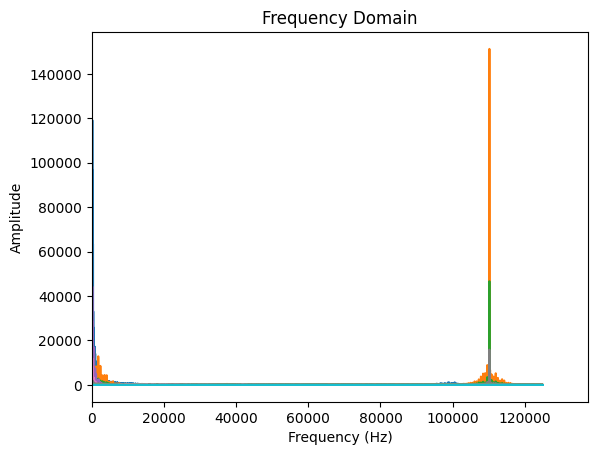

In [35]:
plt.figure(fig) 
plt.xlim(0, None)
plt.show()

The FFT shows a large percentage of high signal strength frequencies located at a lower frequency bandwidth (0 Hz — 5,000 Hz). There is a second bandwidth of relatively high strength frequencies at 100,000 Hz — 120,000 Hz, and there is a dead-band between 20,000 Hz and 90,000 Hz. At the cost of losing information from the high-frequency bandwidth, a decision is made to resample the data at a lower rate of 500 Hz. The lower sampling rate would reduce the number of time-series data points from 250,000 to 2,500, which is two orders of magnitude lower; therefore, significantly reducing the model training time.

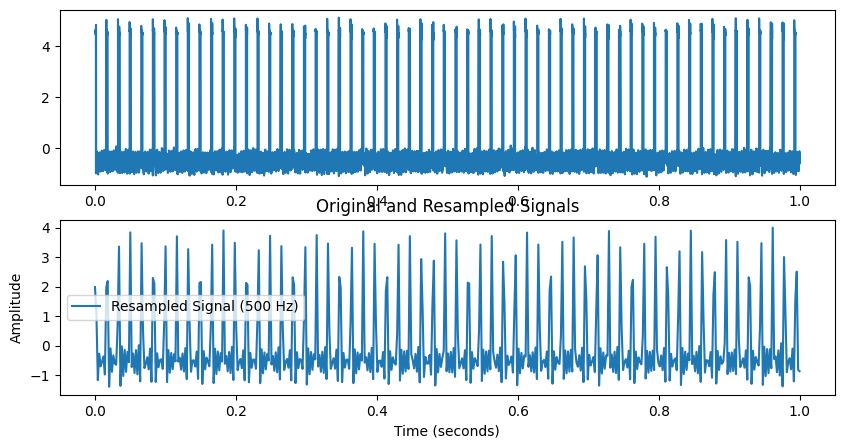

In [37]:
import numpy as np
from scipy.signal import resample
import matplotlib.pyplot as plt

# Assuming you have a signal and its original sampling rate
original_signal = X_tensor_data[0][0]  # Replace with your actual data
original_sampling_rate = len(X_tensor_data[0][0])  # Replace with your actual sampling rate

# Calculate the resampling factor
resampling_factor = original_sampling_rate / 500

# Resample the signal to the target sampling rate of 500 Hz
resampled_signal = resample(original_signal, int(len(original_signal) / resampling_factor))

# Create a time axis for both original and resampled signals
original_time = np.linspace(0, len(original_signal) / original_sampling_rate, len(original_signal))
resampled_time = np.linspace(0, len(resampled_signal) / 500, len(resampled_signal))




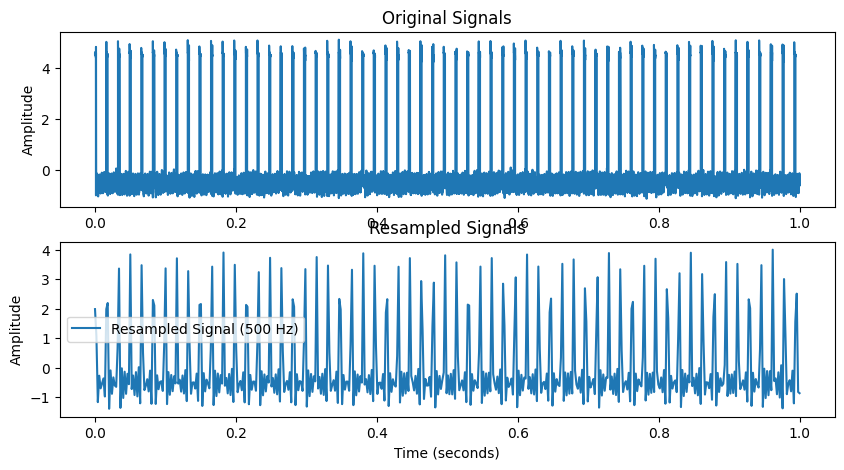

In [38]:
# Plot the original and resampled signals
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(original_time, original_signal, label='Original Signal')
plt.title('Original Signals')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(resampled_time, resampled_signal, label='Resampled Signal (500 Hz)')
plt.title('Resampled Signals')
plt.ylabel('Amplitude')

plt.xlabel('Time (seconds)')


plt.legend()
plt.show()


plt.show()

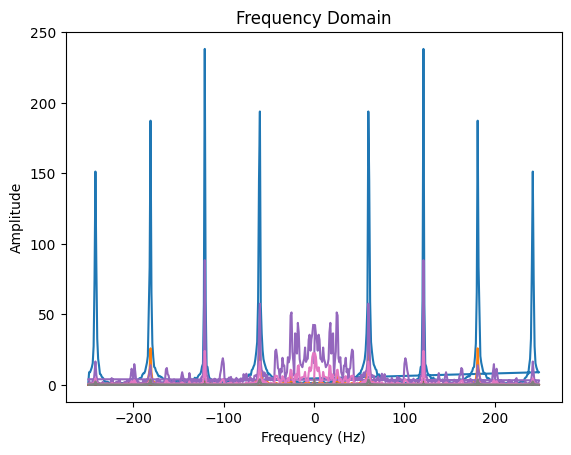

In [45]:
original_sampling_rate = len(X_tensor_data[0][0]) 
# Calculate the resampling factor
resampling_factor = original_sampling_rate / 500

fig, ax = plt.subplots()

for i in range(8) :
    # Assuming you have a signal and its original sampling rate
    original_signal = X_tensor_data[0][i]  # Replace with your actual data

    # Resample the signal to the target sampling rate of 500 Hz
    resampled_signal = resample(original_signal, int(len(original_signal) / resampling_factor))

    resampled_time = np.linspace(0, len(resampled_signal))


    signal =resampled_signal

    n = int(len(resampled_signal))
    
    t = np.linspace(0, 1, n, endpoint=False)  
    # Compute FFT
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(n, d=t[1]-t[0])

    ax.plot(freq, np.abs(fft_result))
    plt.title('Frequency Domain')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')


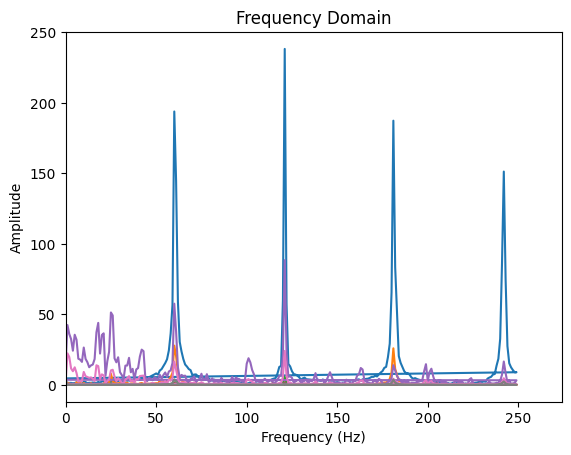

In [46]:
plt.figure(fig) 
plt.xlim(0, None)
plt.show()